Car.png
Noisy Image


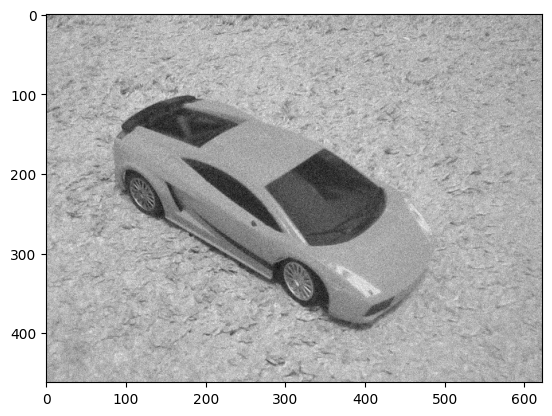

Mean Filtered Image


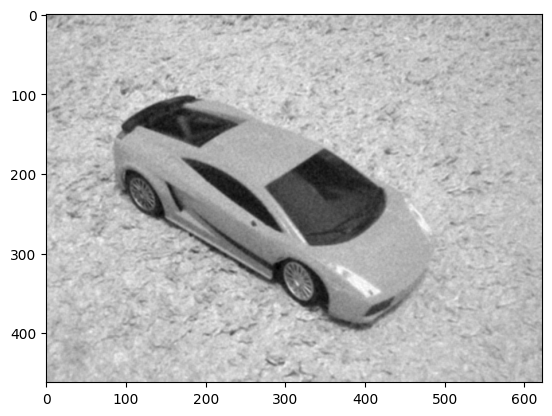

Gaussian Filtered Image


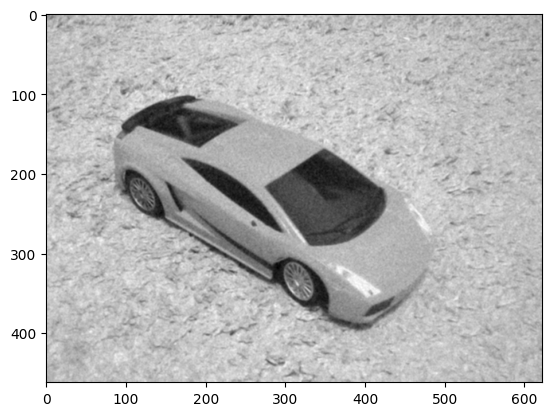

-----------------------------------
Salt and Pepper Noisy Image


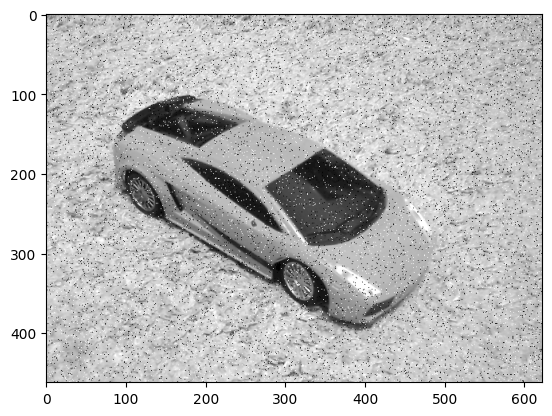

Median Filtered Image


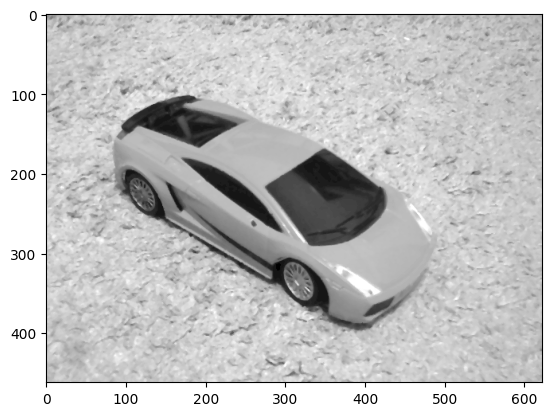

Laplacian Filtered Image


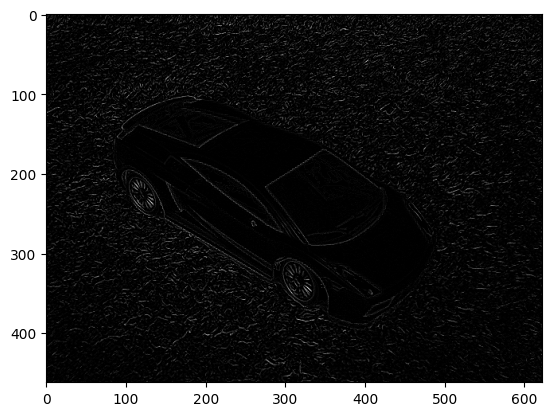

High Boost Filtered Image


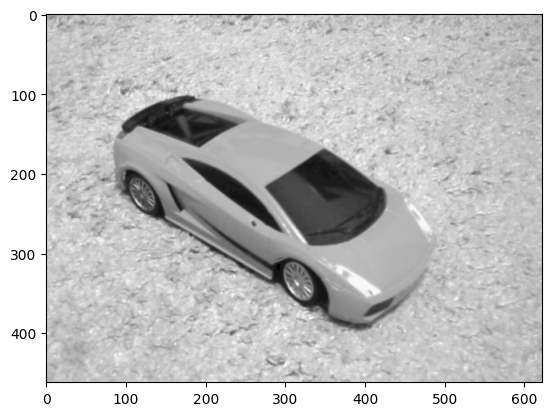

-----------------------------------
Sobel Filtered Image


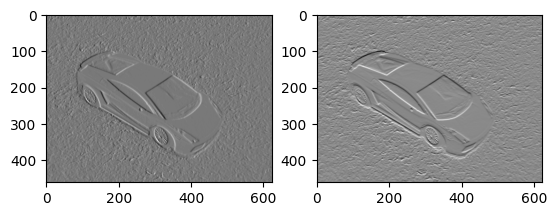

Prewitt Filtered Image


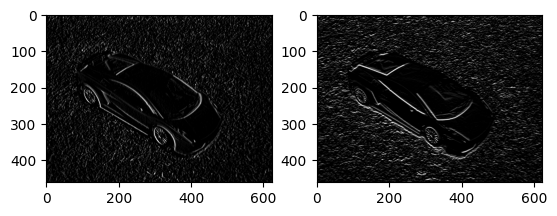

Robert Filtered Image


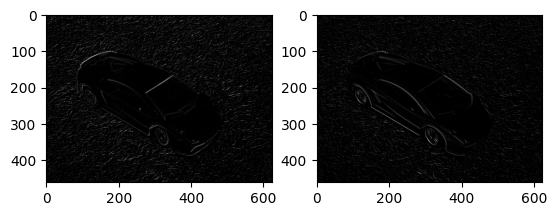

-----------------------------------
Canny Filtered Image


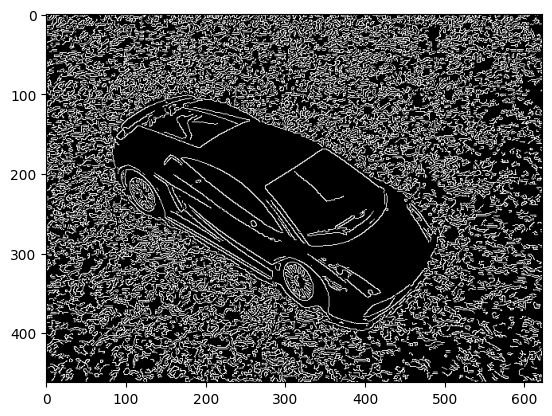

MSE - Sobel: 8739.2043, Prewitt: 8756.0806, Robert: 12632.4519
SSIM - Sobel: 0.3987, Prewitt: 0.3185, Robert: 0.1040
Geometrical_Shapes.png
Noisy Image


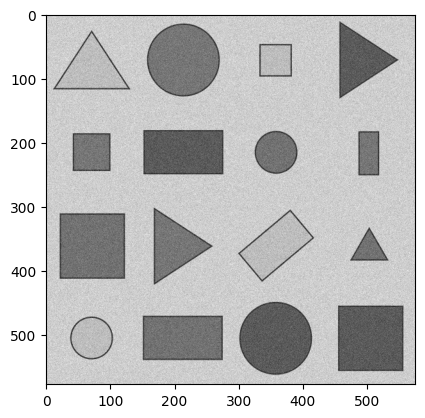

Mean Filtered Image


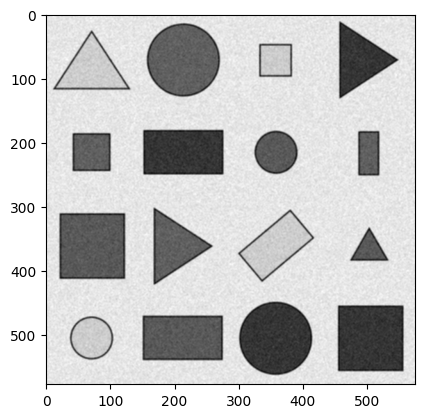

Gaussian Filtered Image


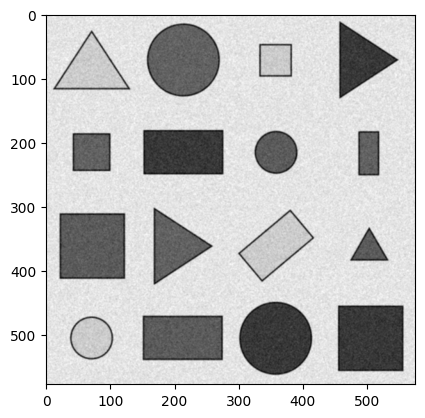

-----------------------------------
Salt and Pepper Noisy Image


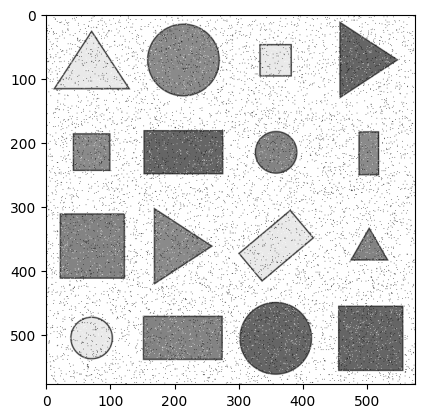

Median Filtered Image


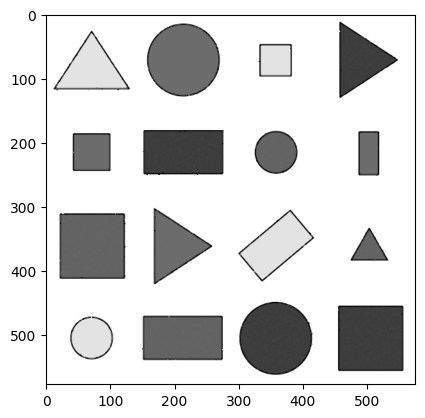

Laplacian Filtered Image


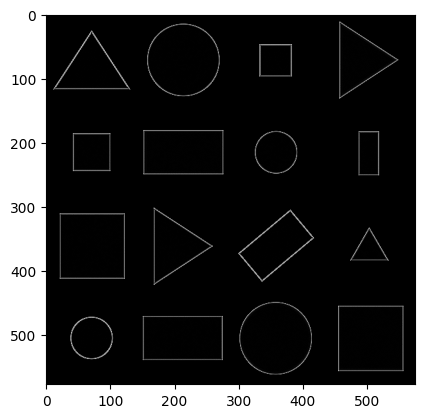

High Boost Filtered Image


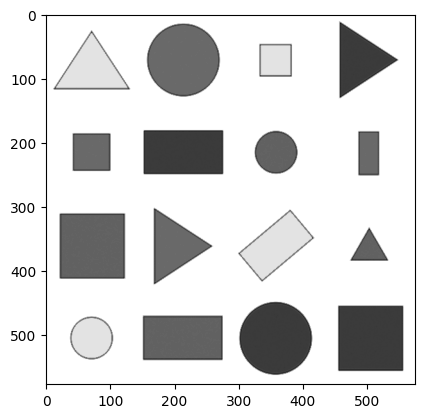

-----------------------------------
Sobel Filtered Image


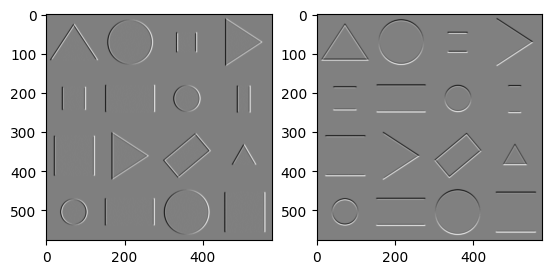

Prewitt Filtered Image


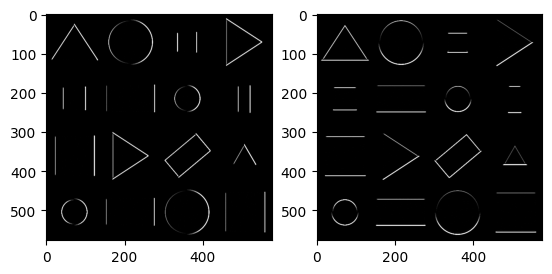

Robert Filtered Image


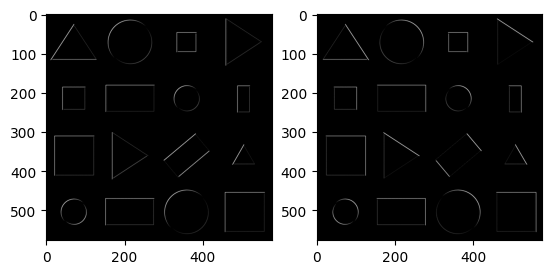

-----------------------------------
Canny Filtered Image


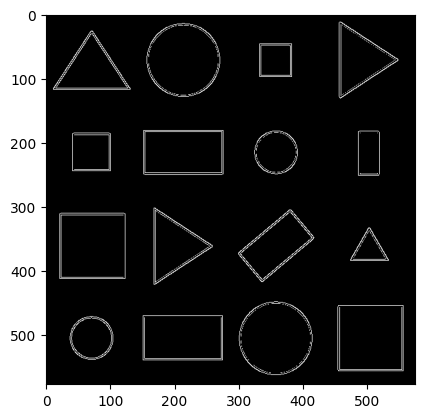

MSE - Sobel: 11238.7545, Prewitt: 5241.3686, Robert: 1230.3807
SSIM - Sobel: 0.8578, Prewitt: 0.8719, Robert: 0.8802
SchoolBus.png
Noisy Image


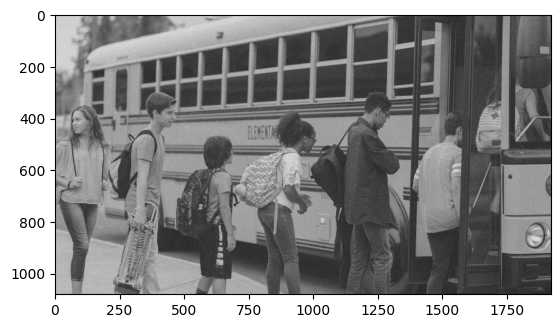

Mean Filtered Image


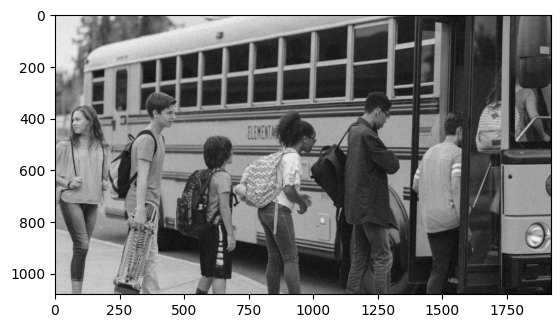

Gaussian Filtered Image


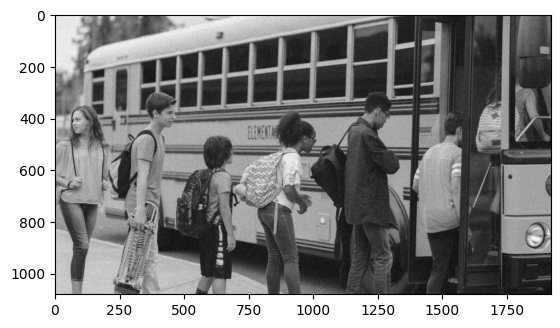

-----------------------------------
Salt and Pepper Noisy Image


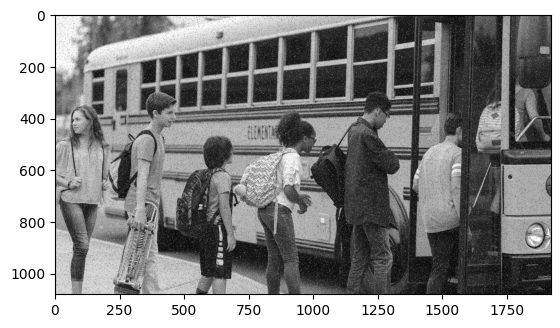

Median Filtered Image


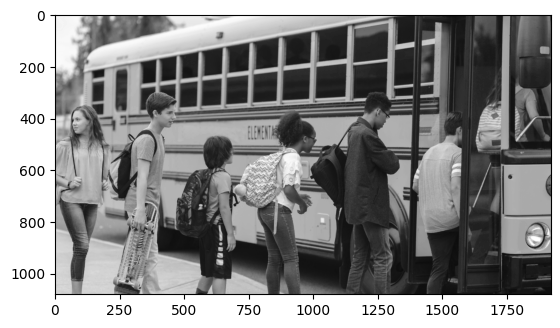

Laplacian Filtered Image


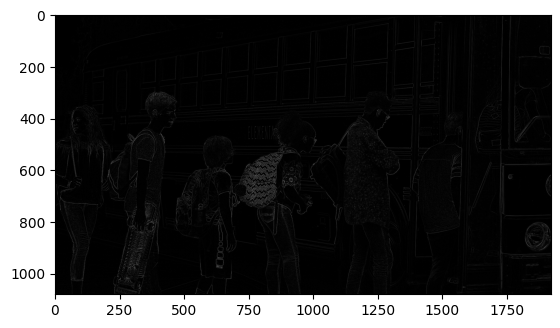

High Boost Filtered Image


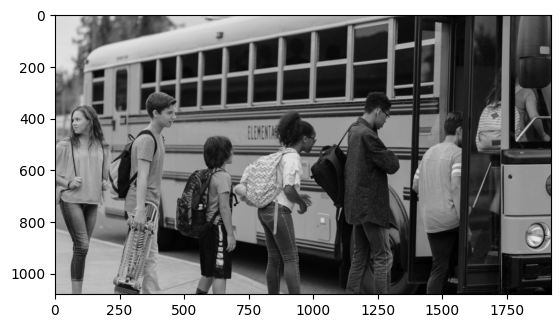

-----------------------------------
Sobel Filtered Image


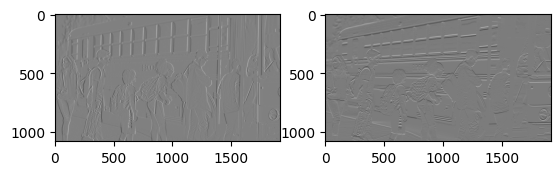

Prewitt Filtered Image


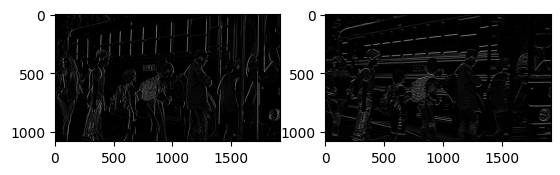

Robert Filtered Image


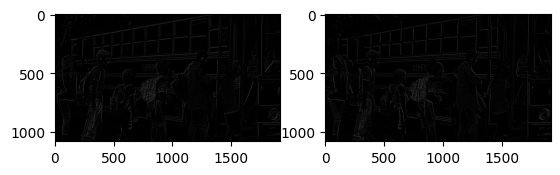

-----------------------------------
Canny Filtered Image


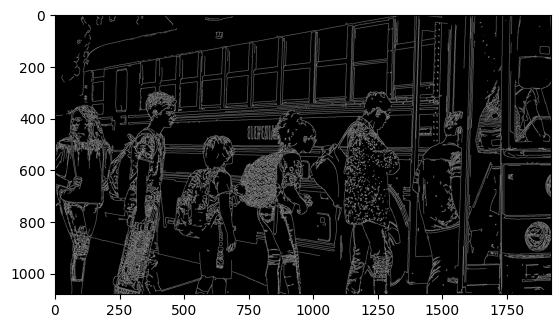

MSE - Sobel: 4973.5388, Prewitt: 3599.8747, Robert: 3986.6885
SSIM - Sobel: 0.4196, Prewitt: 0.4151, Robert: 0.3354
Workers.jpg
Noisy Image


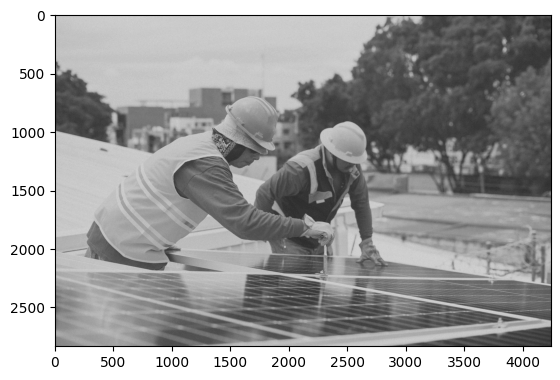

Mean Filtered Image


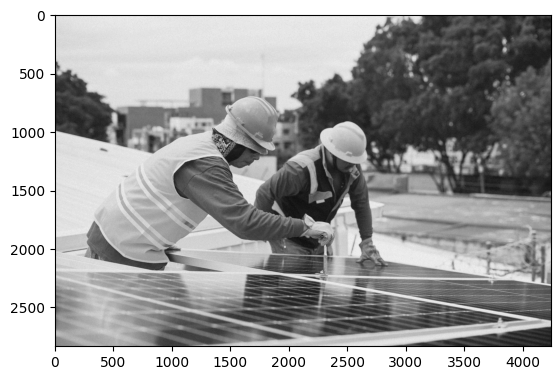

Gaussian Filtered Image


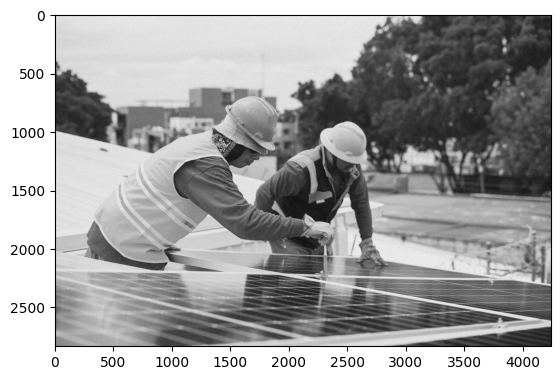

-----------------------------------
Salt and Pepper Noisy Image


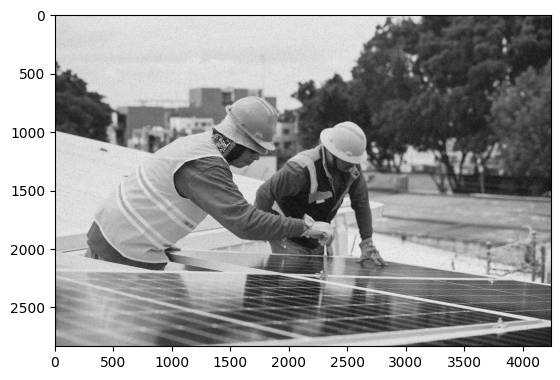

Median Filtered Image


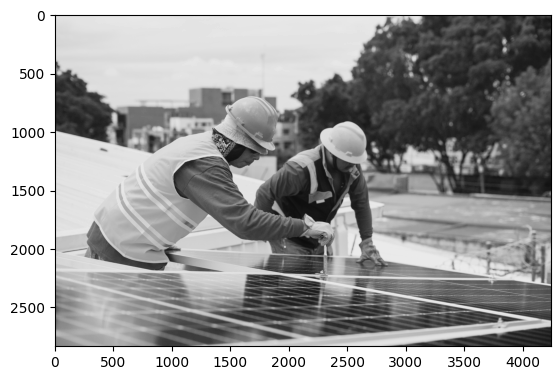

Laplacian Filtered Image


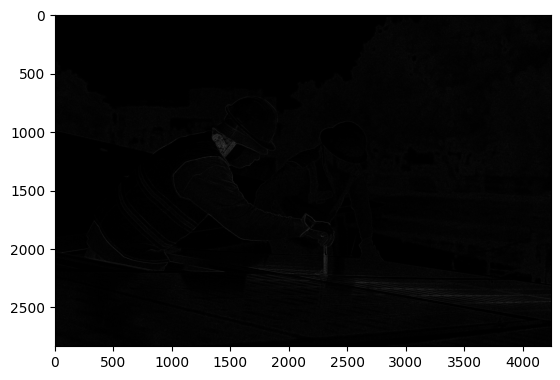

High Boost Filtered Image


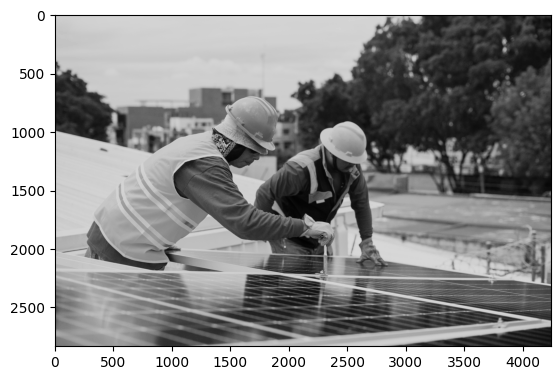

-----------------------------------
Sobel Filtered Image


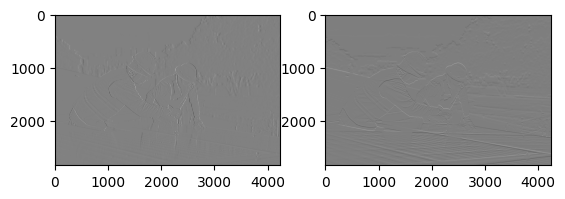

Prewitt Filtered Image


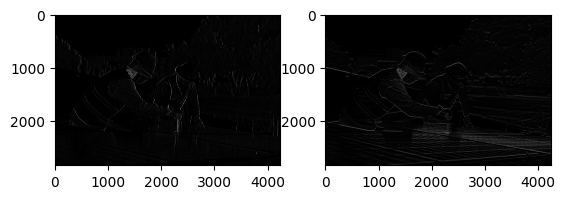

Robert Filtered Image


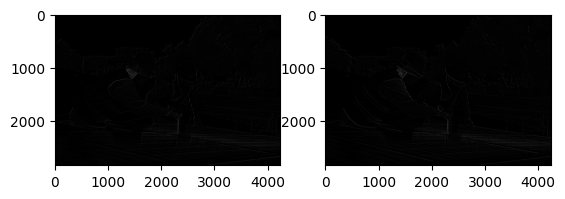

-----------------------------------
Canny Filtered Image


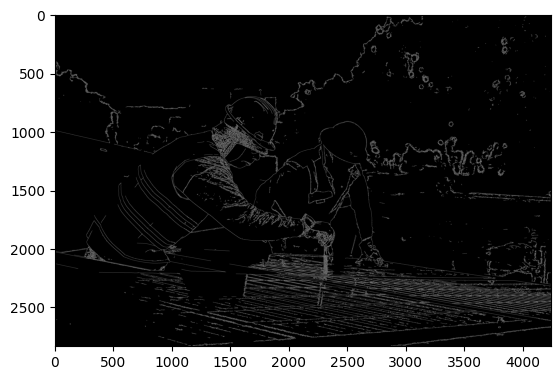

MSE - Sobel: 1924.1052, Prewitt: 1473.8090, Robert: 1553.8105
SSIM - Sobel: 0.3730, Prewitt: 0.3674, Robert: 0.3450


In [ ]:
# not using code provided as baseline since no commenting at all
# Instructions
# For the images provided, perform the following filtering operations in spatial domain.
# 1. Add Noise on the images and then perform Image denoising using mean and Gaussian mean filter.
# 2. Add Salt and Pepper Noise on the images and remove salt and pepper noise using Median Filter.
# 3. Compare the performance of Laplacian with High boost filter on the provided images.
# 4. Perform edge detection by Sobel, Prewitt, and Robert filters.
# 5. Compare the performance of Sobel, Prewitt, and Robert filters with canny edge detectors.

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage as sk
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import structural_similarity as ssim



# 1. Add Noise on the images and then perform Image denoising using mean and Gaussian mean filter.
def noise(image):
    row, col = image.shape
    mean = 0
    var = 15
    #  create noise
    noisy = np.random.normal(mean, var, (row, col))
    noisy = noisy.reshape(row, col)
    noisy = image + noisy
    # now we show the image with noise
    print('Noisy Image')
    plt.imshow(noisy, cmap='gray')
    plt.show()

    #  now we perform the mean filter
    mean_filter = np.ones((3, 3)) / 9
    mean_output = cv2.filter2D(noisy, -1, mean_filter)
    print('Mean Filtered Image')
    plt.imshow(mean_output, cmap='gray')
    plt.show()

    #  now we perform the gaussian filter
    gaussian_filter = cv2.GaussianBlur(noisy, (3, 3), 0)
    print('Gaussian Filtered Image')
    plt.imshow(gaussian_filter, cmap='gray')
    plt.show()

# 2. Add Salt and Pepper Noise on the images and remove salt and pepper noise using Median Filter.
def saltandpeper(image):
    #  setting up standard variables and copying image to avoid changing the original
    row, col = image.shape
    s_vs_p = 0.5
    out = np.copy(image)
    # using scikit-image to add noise
    noisy = sk.util.random_noise(out, mode='s&p', salt_vs_pepper=s_vs_p)
    # convert to 8-bit since after adding noise the image is in float
    noisy = np.array(255 * noisy, dtype='uint8') # Convert image to uint8

    print('Salt and Pepper Noisy Image')
    plt.imshow(noisy, cmap='gray')
    plt.show()

    #  now we perform the median filter and show the image
    median_filter = cv2.medianBlur(noisy, 3)

    print('Median Filtered Image')
    plt.imshow(median_filter, cmap='gray')
    plt.show()

# 3. Compare the performance of Laplacian with High boost filter on the provided images.
def laplacian(image):
    #  setting up standard variables and copying image to avoid changing the original
    row, col = image.shape
    temp_image = image.copy()
    # Laplacian filter kernel for edge detection
    laplacian_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    #  now we perform the laplacian filter and show the image 
    laplacian_output = cv2.filter2D(temp_image, -1, laplacian_filter)

    print('Laplacian Filtered Image')
    plt.imshow(laplacian_output, cmap='gray')
    plt.show()

    #  now we perform the high boost filter and show the image
    high_boost = temp_image + 0.5 * laplacian_output

    print('High Boost Filtered Image')
    plt.imshow(high_boost, cmap='gray')
    plt.show()

# 4. Perform edge detection by Sobel, Prewitt, and Robert filters.
def edgeDetection(image):
    #  setting up standard variables and copying image to avoid changing the original
    row, col = image.shape
    temp_image = image.copy()
    # Sobel filter kernel for edge detection
    sobelx = cv2.Sobel(temp_image, cv2.CV_64F, 1, 0, ksize = 5)
    sobely = cv2.Sobel(temp_image, cv2.CV_64F, 0, 1, ksize = 5)
    
    # Prewitt filter kernel for edge detection
    prewitt_filterx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_filtery = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Robert filter kernel for edge detection
    robert_filterx = np.array([[1, 0], [0, -1]])
    robert_filtery = np.array([[0, 1], [-1, 0]])
    
    #  now we perform the sobel filter of both x and y and show the image in same plot
    print('Sobel Filtered Image')
    plt.subplot(1, 2, 1)
    plt.imshow(sobelx, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(sobely, cmap='gray')
    plt.show()
    
    #  now we perform the prewitt filter of both x and y and show the image in same plot
    prewitt_outputx = cv2.filter2D(temp_image, -1, prewitt_filterx)
    prewitt_outputy = cv2.filter2D(temp_image, -1, prewitt_filtery)
    print('Prewitt Filtered Image')
    plt.subplot(1, 2, 1)
    plt.imshow(prewitt_outputx, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(prewitt_outputy, cmap='gray')
    plt.show()

    #  now we perform the robert filter of both x and y and show the image in same plot
    robert_outputx = cv2.filter2D(temp_image, -1, robert_filterx)
    robert_outputy = cv2.filter2D(temp_image, -1, robert_filtery)
    print('Robert Filtered Image')
    plt.subplot(1, 2, 1)
    plt.imshow(robert_outputx, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(robert_outputy, cmap='gray')
    plt.show()


# 5. Compare the performance of Sobel, Prewitt, and Robert filters with canny edge detectors.
def canny(image):
    #  setting up standard variables and copying image to avoid changing the original
    temp_image = image.copy()
    #  now we perform the canny filter and show the image
    canny_output = cv2.Canny(temp_image, 50, 120)

    print('Canny Filtered Image')
    plt.imshow(canny_output, cmap='gray')
    plt.show()

    # Apply Sobel Edge Detector (both x and y directions) and merge the results
    sobel_x = cv2.Sobel(temp_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(temp_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_output = cv2.magnitude(sobel_x, sobel_y)
    
    # Apply Prewitt Edge Detector and merge the results
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    # converting to float32 since magnitude requires float32 before mergiung
    prewitt_output_x = cv2.filter2D(temp_image, cv2.CV_32F, prewitt_x)
    prewitt_output_y = cv2.filter2D(temp_image, cv2.CV_32F, prewitt_y)
    prewitt_output = cv2.magnitude(prewitt_output_x, prewitt_output_y)
    
    # Apply Robert Edge Detector and merge the results
    robert_x = np.array([[1, 0], [0, -1]])
    robert_y = np.array([[0, 1], [-1, 0]])
    # converting to float32 since magnitude requires float32 before mergiung
    robert_output_x = cv2.filter2D(temp_image, cv2.CV_32F, robert_x)
    robert_output_y = cv2.filter2D(temp_image, cv2.CV_32F, robert_y)
    robert_output = cv2.magnitude(robert_output_x, robert_output_y)
    
    # Calculate Performance Metrics
    mse_sobel = mse(canny_output, sobel_output)
    mse_prewitt = mse(canny_output, prewitt_output)
    mse_robert = mse(canny_output, robert_output)

    ssim_sobel = ssim(canny_output, sobel_output, data_range=sobel_output.max() - sobel_output.min())
    ssim_prewitt = ssim(canny_output, prewitt_output, data_range=prewitt_output.max() - prewitt_output.min())
    ssim_robert = ssim(canny_output, robert_output, data_range=robert_output.max() - robert_output.min())

    print(f'MSE - Sobel: {mse_sobel:.4f}, Prewitt: {mse_prewitt:.4f}, Robert: {mse_robert:.4f}')
    print(f'SSIM - Sobel: {ssim_sobel:.4f}, Prewitt: {ssim_prewitt:.4f}, Robert: {ssim_robert:.4f}')




# first we add images to the code and append the function to perform the operations reqyured in the question
for i in os.listdir('.'):
    if i.endswith(('.png', '.jpg', '.jpeg')):
        print(i)
        img = cv2.imread(i, 0)
        #  first part of the question
        noisy = noise(img)
        #  second part of the question
        print('-----------------------------------')
        saltandpeper(img)
        #  third part of the question
        laplacian(img)
        print('-----------------------------------')
        #  fourth part of the question
        edgeDetection(img)
        print('-----------------------------------')
        #  fifth part of the question
        canny(img)

        


